<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter11/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q torch_snippets
from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_dataset = datasets.MNIST(root='MNIST/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='MNIST/', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.0 MB/s eta 0:00:00
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.15MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Epoch 1/10 Progress: 10.00% 
Epoch 1 - Avg Train Loss: 46.1399, Avg Val Loss: 37.8689


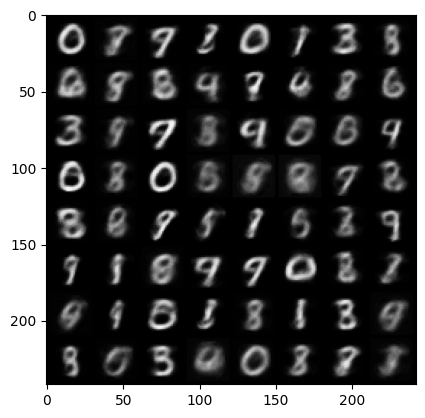

Epoch 2/10 Progress: 20.00% 
Epoch 2 - Avg Train Loss: 40.6097, Avg Val Loss: 35.4192


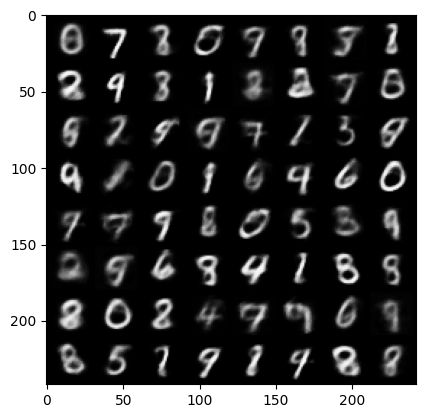

Epoch 3/10 Progress: 30.00% 
Epoch 3 - Avg Train Loss: 37.9274, Avg Val Loss: 34.2174


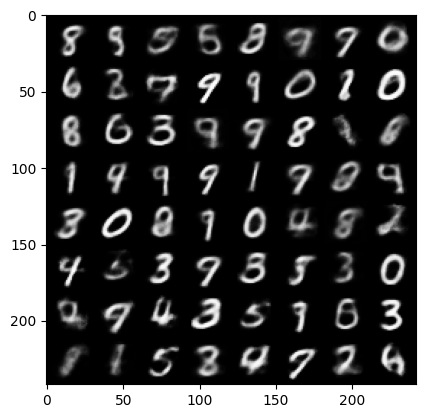

Epoch 4/10 Progress: 40.00% 
Epoch 4 - Avg Train Loss: 36.3268, Avg Val Loss: 33.3809


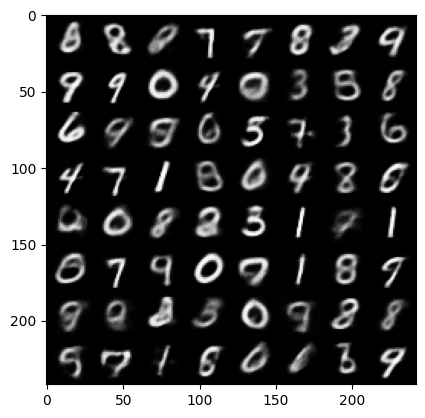

Epoch 5/10 Progress: 50.00% 
Epoch 5 - Avg Train Loss: 35.1962, Avg Val Loss: 32.7339


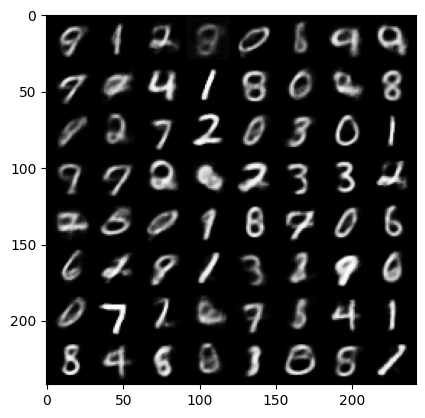

Epoch 6/10 Progress: 60.00% 
Epoch 6 - Avg Train Loss: 34.3566, Avg Val Loss: 32.2930


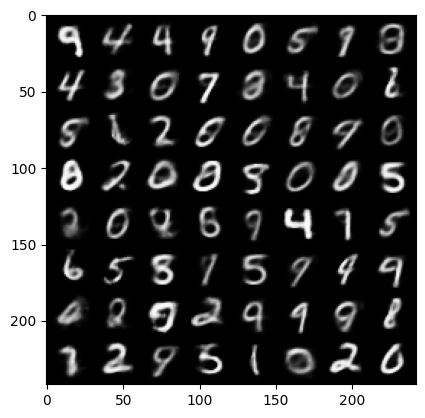

Epoch 7/10 Progress: 70.00% 
Epoch 7 - Avg Train Loss: 33.7027, Avg Val Loss: 31.8956


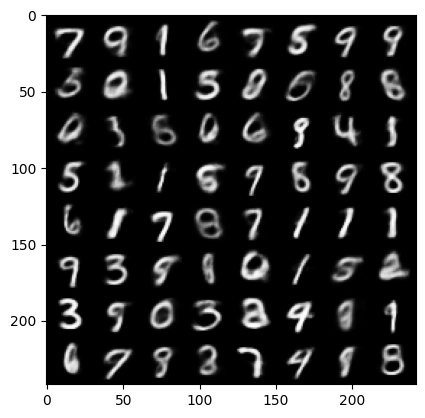

Epoch 8/10 Progress: 80.00% 
Epoch 8 - Avg Train Loss: 33.1763, Avg Val Loss: 31.5709


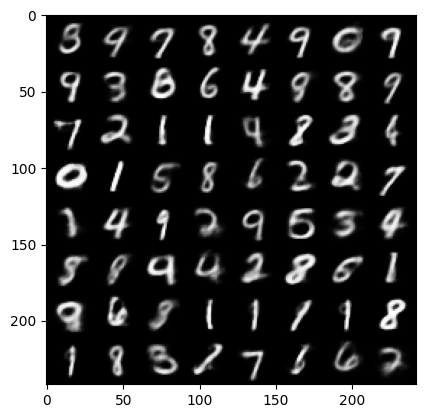

Epoch 9/10 Progress: 90.00% 
Epoch 9 - Avg Train Loss: 32.7407, Avg Val Loss: 31.2953


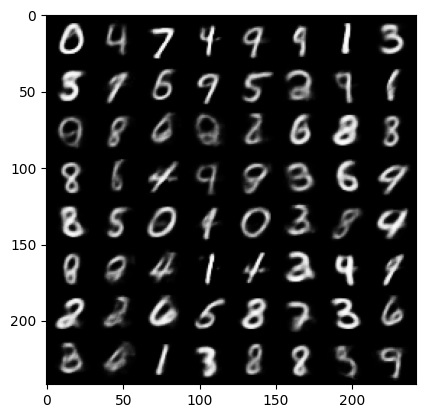

Epoch 10/10 Progress: 100.00% 
Epoch 10 - Avg Train Loss: 32.3695, Avg Val Loss: 31.0657


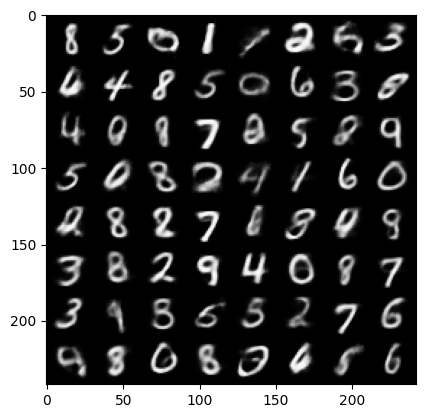

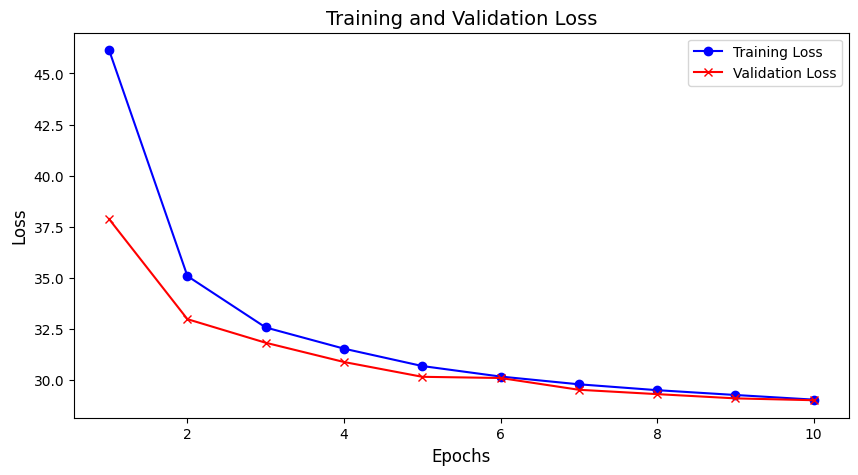

In [17]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torchvision.utils import make_grid
# import matplotlib.pyplot as plt

# # Define VAE Model
# class VAE(nn.Module):
#     def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
#         super(VAE, self).__init__()
#         self.d1 = nn.Linear(x_dim, h_dim1)
#         self.d2 = nn.Linear(h_dim1, h_dim2)
#         self.d31 = nn.Linear(h_dim2, z_dim)
#         self.d32 = nn.Linear(h_dim2, z_dim)
#         self.d4 = nn.Linear(z_dim, h_dim2)
#         self.d5 = nn.Linear(h_dim2, h_dim1)
#         self.d6 = nn.Linear(h_dim1, x_dim)

#     def encoder(self, x):
#         h = F.relu(self.d1(x))
#         h = F.relu(self.d2(h))
#         return self.d31(h), self.d32(h)

#     def sampling(self, mean, log_var):
#         std = torch.exp(0.5 * log_var)
#         eps = torch.randn_like(std)
#         return eps.mul(std).add_(mean)

#     def decoder(self, z):
#         h = F.relu(self.d4(z))
#         h = F.relu(self.d5(h))
#         return torch.sigmoid(self.d6(h))

#     def forward(self, x):
#         mean, log_var = self.encoder(x.view(-1, 784))
#         z = self.sampling(mean, log_var)
#         return self.decoder(z), mean, log_var

# # Loss function for VAE
# def loss_function(recon_x, x, mean, log_var):
#     RECON = F.mse_loss(recon_x, x.view(-1, 784), reduction='sum')
#     KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
#     return RECON + KLD, RECON, KLD

# # Training batch function
# def train_batch(data, model, optimizer, loss_function):
#     model.train()
#     data = data.to(device)
#     optimizer.zero_grad()
#     recon_batch, mean, log_var = model(data)
#     loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
#     loss.backward()
#     optimizer.step()
#     return loss, mse, kld, log_var.mean(), mean.mean()

# # Validation batch function
# @torch.no_grad()
# def validate_batch(data, model, loss_function):
#     model.eval()
#     data = data.to(device)
#     recon, mean, log_var = model(data)
#     loss, mse, kld = loss_function(recon, data, mean, log_var)
#     return loss, mse, kld, log_var.mean(), mean.mean()

# # Report class for tracking and plotting loss
# class Report:
#     def __init__(self, num_epochs):
#         self.num_epochs = num_epochs
#         self.history = {'epoch': [], 'train_loss': [], 'val_loss': []}

#     def record(self, epoch, train_loss=None, val_loss=None):
#         if train_loss is not None:
#             self.history['train_loss'].append(train_loss)
#         if val_loss is not None:
#             self.history['val_loss'].append(val_loss)

#         print(f"Epoch {epoch}/{self.num_epochs} Progress: {epoch/self.num_epochs*100:.2f}%", end=' ')

#     def report_avgs(self, epoch):
#         avg_train_loss = sum(self.history['train_loss']) / len(self.history['train_loss'])
#         avg_val_loss = sum(self.history['val_loss']) / len(self.history['val_loss'])
#         print(f"\nEpoch {epoch} - Avg Train Loss: {avg_train_loss:.4f}, Avg Val Loss: {avg_val_loss:.4f}")

#     def plot_epochs(self, log=False):
#         epochs = list(range(1, self.num_epochs + 1))
#         plt.figure(figsize=(10, 5))

#         # Plot training loss
#         plt.plot(epochs, self.history['train_loss'], label='Training Loss', color='blue', marker='o')

#         # Plot validation loss
#         plt.plot(epochs, self.history['val_loss'], label='Validation Loss', color='red', marker='x')

#         plt.xlabel('Epochs', fontsize=12)
#         plt.ylabel('Loss', fontsize=12)
#         plt.title('Training and Validation Loss', fontsize=14)
#         plt.legend()

#         if log:
#             plt.savefig('loss_plot.png')

#         plt.show()

# # Create VAE model
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# vae = VAE(x_dim=784, h_dim1=512, h_dim2=256, z_dim=50).to(device)
# optimizer = optim.AdamW(vae.parameters(), lr=1e-3)

# n_epochs = 10
# log = Report(n_epochs)

# # Training loop
# for epoch in range(n_epochs):
#     N = len(train_loader)
#     for batch_idx, (data, _) in enumerate(train_loader):
#         loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
#         pos = epoch + (1 + batch_idx) / N
#         log.record(pos,
#                    train_loss=loss.item())

#     N = len(test_loader)
#     for batch_idx, (data, _) in enumerate(test_loader):
#         loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
#         pos = epoch + (1 + batch_idx) / N
#         log.record(pos,
#                    val_loss=loss.item())

#     log.report_avgs(epoch + 1)

#     with torch.no_grad():
#         z = torch.randn(64, 50).to(device)
#         sample = vae.decoder(z).to(device)  # Generate images from the decoder
#         images = make_grid(sample.view(64, 1, 28, 28)).permute(1, 2, 0)  # Create image grid and permute
#         plt.imshow(images.cpu().numpy())
#         plt.show()

# log.plot_epochs(log=True)  # Plot training and validation loss after training
#  # Plot training and validation loss after training

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Define VAE Model
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE, self).__init__()
        self.d1 = nn.Linear(x_dim, h_dim1)
        self.d2 = nn.Linear(h_dim1, h_dim2)
        self.d31 = nn.Linear(h_dim2, z_dim)
        self.d32 = nn.Linear(h_dim2, z_dim)
        self.d4 = nn.Linear(z_dim, h_dim2)
        self.d5 = nn.Linear(h_dim2, h_dim1)
        self.d6 = nn.Linear(h_dim1, x_dim)

    def encoder(self, x):
        h = F.relu(self.d1(x))
        h = F.relu(self.d2(h))
        return self.d31(h), self.d32(h)

    def sampling(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mean)

    def decoder(self, z):
        h = F.relu(self.d4(z))
        h = F.relu(self.d5(h))
        return torch.sigmoid(self.d6(h))

    def forward(self, x):
        mean, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mean, log_var)
        return self.decoder(z), mean, log_var

# Loss function for VAE
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD

# Training batch function
def train_batch(data, model, optimizer, loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss.item(), mse.item(), kld.item(), log_var.mean().item(), mean.mean().item()

# Validation batch function
@torch.no_grad()
def validate_batch(data, model, loss_function):
    model.eval()
    data = data.to(device)
    recon, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon, data, mean, log_var)
    return loss.item(), mse.item(), kld.item(), log_var.mean().item(), mean.mean().item()

# Report class for tracking and plotting loss
class Report:
    def __init__(self, num_epochs):
        self.num_epochs = num_epochs
        self.history = {'epoch': [], 'train_loss': [], 'val_loss': []}

    def record(self, epoch, train_loss=None, val_loss=None):
        if train_loss is not None:
            self.history['train_loss'].append(train_loss)
        if val_loss is not None:
            self.history['val_loss'].append(val_loss)

        print(f"Epoch {epoch}/{self.num_epochs} Progress: {epoch/self.num_epochs*100:.2f}%", end=' ')

    def report_avgs(self, epoch):
        avg_train_loss = sum(self.history['train_loss']) / len(self.history['train_loss'])
        avg_val_loss = sum(self.history['val_loss']) / len(self.history['val_loss'])
        print(f"\nEpoch {epoch} - Avg Train Loss: {avg_train_loss:.4f}, Avg Val Loss: {avg_val_loss:.4f}")

    def plot_epochs(self, log=False):
        epochs = list(range(1, self.num_epochs + 1))
        plt.figure(figsize=(10, 5))

        # Plot training loss
        plt.plot(epochs, self.history['train_loss'], label='Training Loss', color='blue', marker='o')

        # Plot validation loss
        plt.plot(epochs, self.history['val_loss'], label='Validation Loss', color='red', marker='x')

        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel('Loss', fontsize=12)
        plt.title('Training and Validation Loss', fontsize=14)
        plt.legend()

        if log:
            plt.savefig('loss_plot.png')

        plt.show()

# Create VAE model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vae = VAE(x_dim=784, h_dim1=512, h_dim2=256, z_dim=50).to(device)
optimizer = optim.AdamW(vae.parameters(), lr=1e-3)

n_epochs = 10
log = Report(n_epochs)

# Training loop
for epoch in range(n_epochs):
    N = len(train_loader)
    train_loss_epoch = 0  # Sum of train losses for this epoch
    for batch_idx, (data, _) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        train_loss_epoch += loss

    val_loss_epoch = 0  # Sum of validation losses for this epoch
    N = len(test_loader)
    for batch_idx, (data, _) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        val_loss_epoch += loss

    # Calculate average losses for the epoch
    avg_train_loss = train_loss_epoch / len(train_loader.dataset)
    avg_val_loss = val_loss_epoch / len(test_loader.dataset)

    # Record the average loss for the epoch
    log.record(epoch + 1, train_loss=avg_train_loss, val_loss=avg_val_loss)
    log.report_avgs(epoch + 1)

    with torch.no_grad():
        z = torch.randn(64, 50).to(device)
        sample = vae.decoder(z).to(device)  # Generate images from the decoder
        images = make_grid(sample.view(64, 1, 28, 28)).permute(1, 2, 0)  # Create image grid and permute
        plt.imshow(images.cpu().numpy())
        plt.show()

log.plot_epochs(log=True)  # Plot training and validation loss after training

